In [23]:
import zarr
import glob

# Find all Zarr filese
zarr_files = sorted(glob.glob("rawgrid.zarr*"))
#zarr_files = sorted(glob.glob("testout/rawgrid.pe*"))
print(zarr_files)  # Check detected files

['rawgrid.zarr00000000', 'rawgrid.zarr00000001', 'rawgrid.zarr00000002', 'rawgrid.zarr00000003', 'rawgrid.zarr00000004', 'rawgrid.zarr00000005', 'rawgrid.zarr00000006', 'rawgrid.zarr00000007', 'rawgrid.zarr00000008', 'rawgrid.zarr00000009', 'rawgrid.zarr00000010', 'rawgrid.zarr00000011', 'rawgrid.zarr00000012', 'rawgrid.zarr00000013', 'rawgrid.zarr00000014', 'rawgrid.zarr00000015', 'rawgrid.zarr00000016', 'rawgrid.zarr00000017', 'rawgrid.zarr00000018', 'rawgrid.zarr00000019', 'rawgrid.zarr00000020', 'rawgrid.zarr00000021', 'rawgrid.zarr00000022', 'rawgrid.zarr00000023', 'rawgrid.zarr00000024', 'rawgrid.zarr00000025', 'rawgrid.zarr00000026', 'rawgrid.zarr00000027', 'rawgrid.zarr00000028', 'rawgrid.zarr00000029', 'rawgrid.zarr00000030', 'rawgrid.zarr00000031', 'rawgrid.zarr00000032', 'rawgrid.zarr00000033', 'rawgrid.zarr00000034', 'rawgrid.zarr00000035', 'rawgrid.zarr00000036', 'rawgrid.zarr00000037', 'rawgrid.zarr00000038', 'rawgrid.zarr00000039']


In [24]:
all_data = []

for filename in zarr_files:
    zarr_store = zarr.open(filename, mode="r")  # Open the Zarr file
    data = zarr_store[:]
    all_data.append(data)

# Convert list of Zarr arrays into a single NumPy array
import numpy as np
all_data = np.array(all_data)

print("Loaded Zarr data shape:", all_data.shape)

Loaded Zarr data shape: (40, 18, 18, 3)


In [25]:
print("Data shape:", data.shape)
print("Min:", all_data.min(), "Max:", all_data.max(), "Mean:", all_data.mean())

Data shape: (18, 18, 3)
Min: -1.0 Max: 1.0 Mean: -4.448430190463422e-06


In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = all_data[..., 0]  # All x-coordinates
Y = all_data[..., 1]  # All y-coordinates
Z = all_data[..., 2]  # All z-coordinates

#X = data[..., 0]  # All x-coordinates
#Y = data[..., 1]  # All y-coordinates
#Z = data[..., 2]  # All z-coordinates

#for r in range(all_data.shape[0])
#    for i in range(all_data.shape[1])
#        for j in range(all_data.shape[2])

        # Extract X, Y, Z coordinates#
#        X = data[r,i,j,0]  # All x-coordinates
#        Y = data[r,i,j,1]  # All y-coordinates
#        Z = data[r,i,j,2]  # All z-coordinates


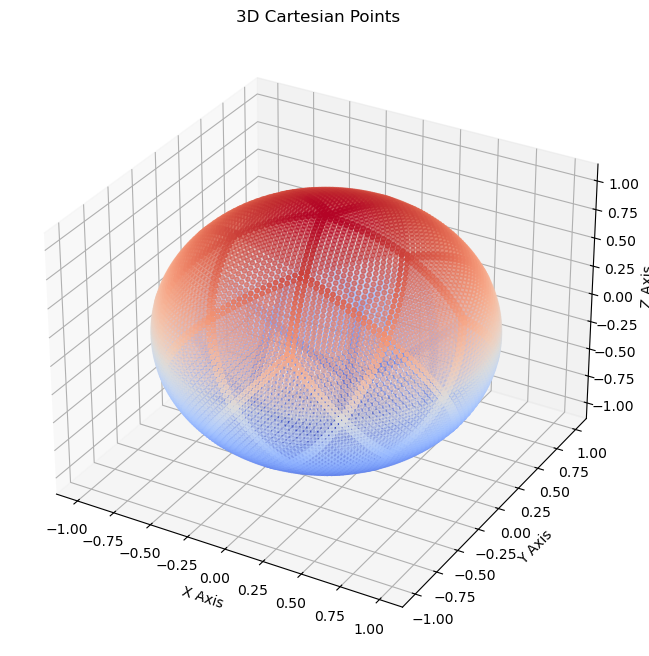

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten X, Y, Z for plotting
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap="coolwarm", s=10, alpha=0.6)

# Labels & Title
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D Cartesian Points")

plt.show()

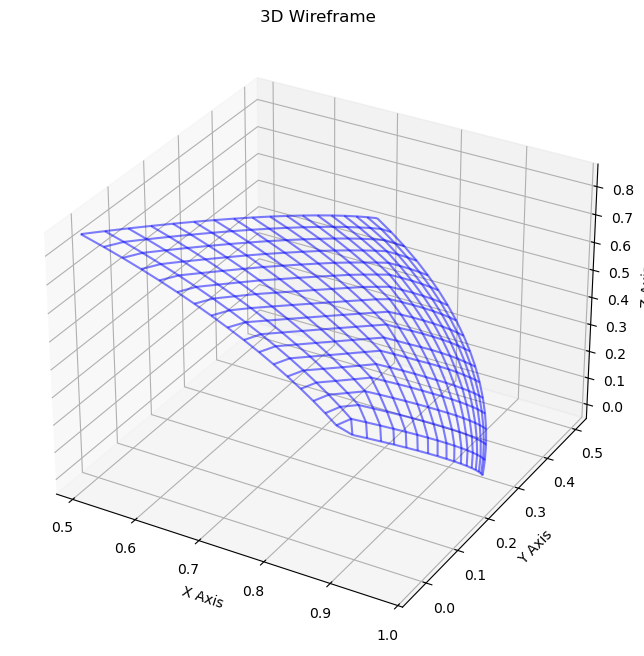

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot wireframe (for the first "40" slice)
ax.plot_wireframe(X[0], Y[0], Z[0], color='blue', alpha=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D Wireframe")
plt.show()

#for r in range(40):
#    ax.plot_wireframe(X[r], Y[r], Z[r], color='blue', alpha=0.5)

#    ax.set_xlabel("X Axis")
#    ax.set_ylabel("Y Axis")
#    ax.set_zlabel("Z Axis")
#    ax.set_title("3D Wireframe")
#    plt.show()


In [36]:
#If you have mayavi 

In [37]:
from mayavi import mlab

mlab.figure(bgcolor=(1, 1, 1))
mlab.points3d(X.flatten(), Y.flatten(), Z.flatten(), Z.flatten(), scale_mode='none', scale_factor=0.05, colormap="jet")
mlab.show()
